# Импорты

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')


# Лабораторная №2
## Курочкин Д.В.

### Новый датасет

* work_year: Год, за который была выплачена зарплата.

* experience_level: Уровень опыта работы в течение года.
EN > Начальный уровень / Junior
MI> Средний уровень / Intermediate
SE > Старший уровень / Expert
EX > Тип занятости на уровне руководителя / директора

* Тип занятости для данной должности.
PT > Неполный рабочий день
FT > Полный рабочий день
CT > Контракт
FL > Внештатный сотрудник

* название вакансии: Должность, на которой вы работали в течение года.

* заработная плата: зарплата гросс.

* salary_currency: Валюта выплаченной заработной платы в соответствии с кодом валюты ISO 4217.

* salaryinusd: Заработная плата в долларах США.

* employee_residence: страна основного проживания сотрудника в течение рабочего года в соответствии с кодом страны ISO 3166.

* remote_ratio: Общий объем работы, выполняемой удаленно.

* company_location: Страна, в которой находится главный офис работодателя или филиал по контракту.

* размер компании: среднее число работающих в ней людей.

In [ ]:
df_salaries = pd.read_csv('data/ds_salaries.csv')
# Для удобтва будем работать толькой зарплатой в долларх
df_salaries = df_salaries[df_salaries['salary_currency'] == "USD"]
df_salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L


(0.0, 7.2198991814559566e-06)

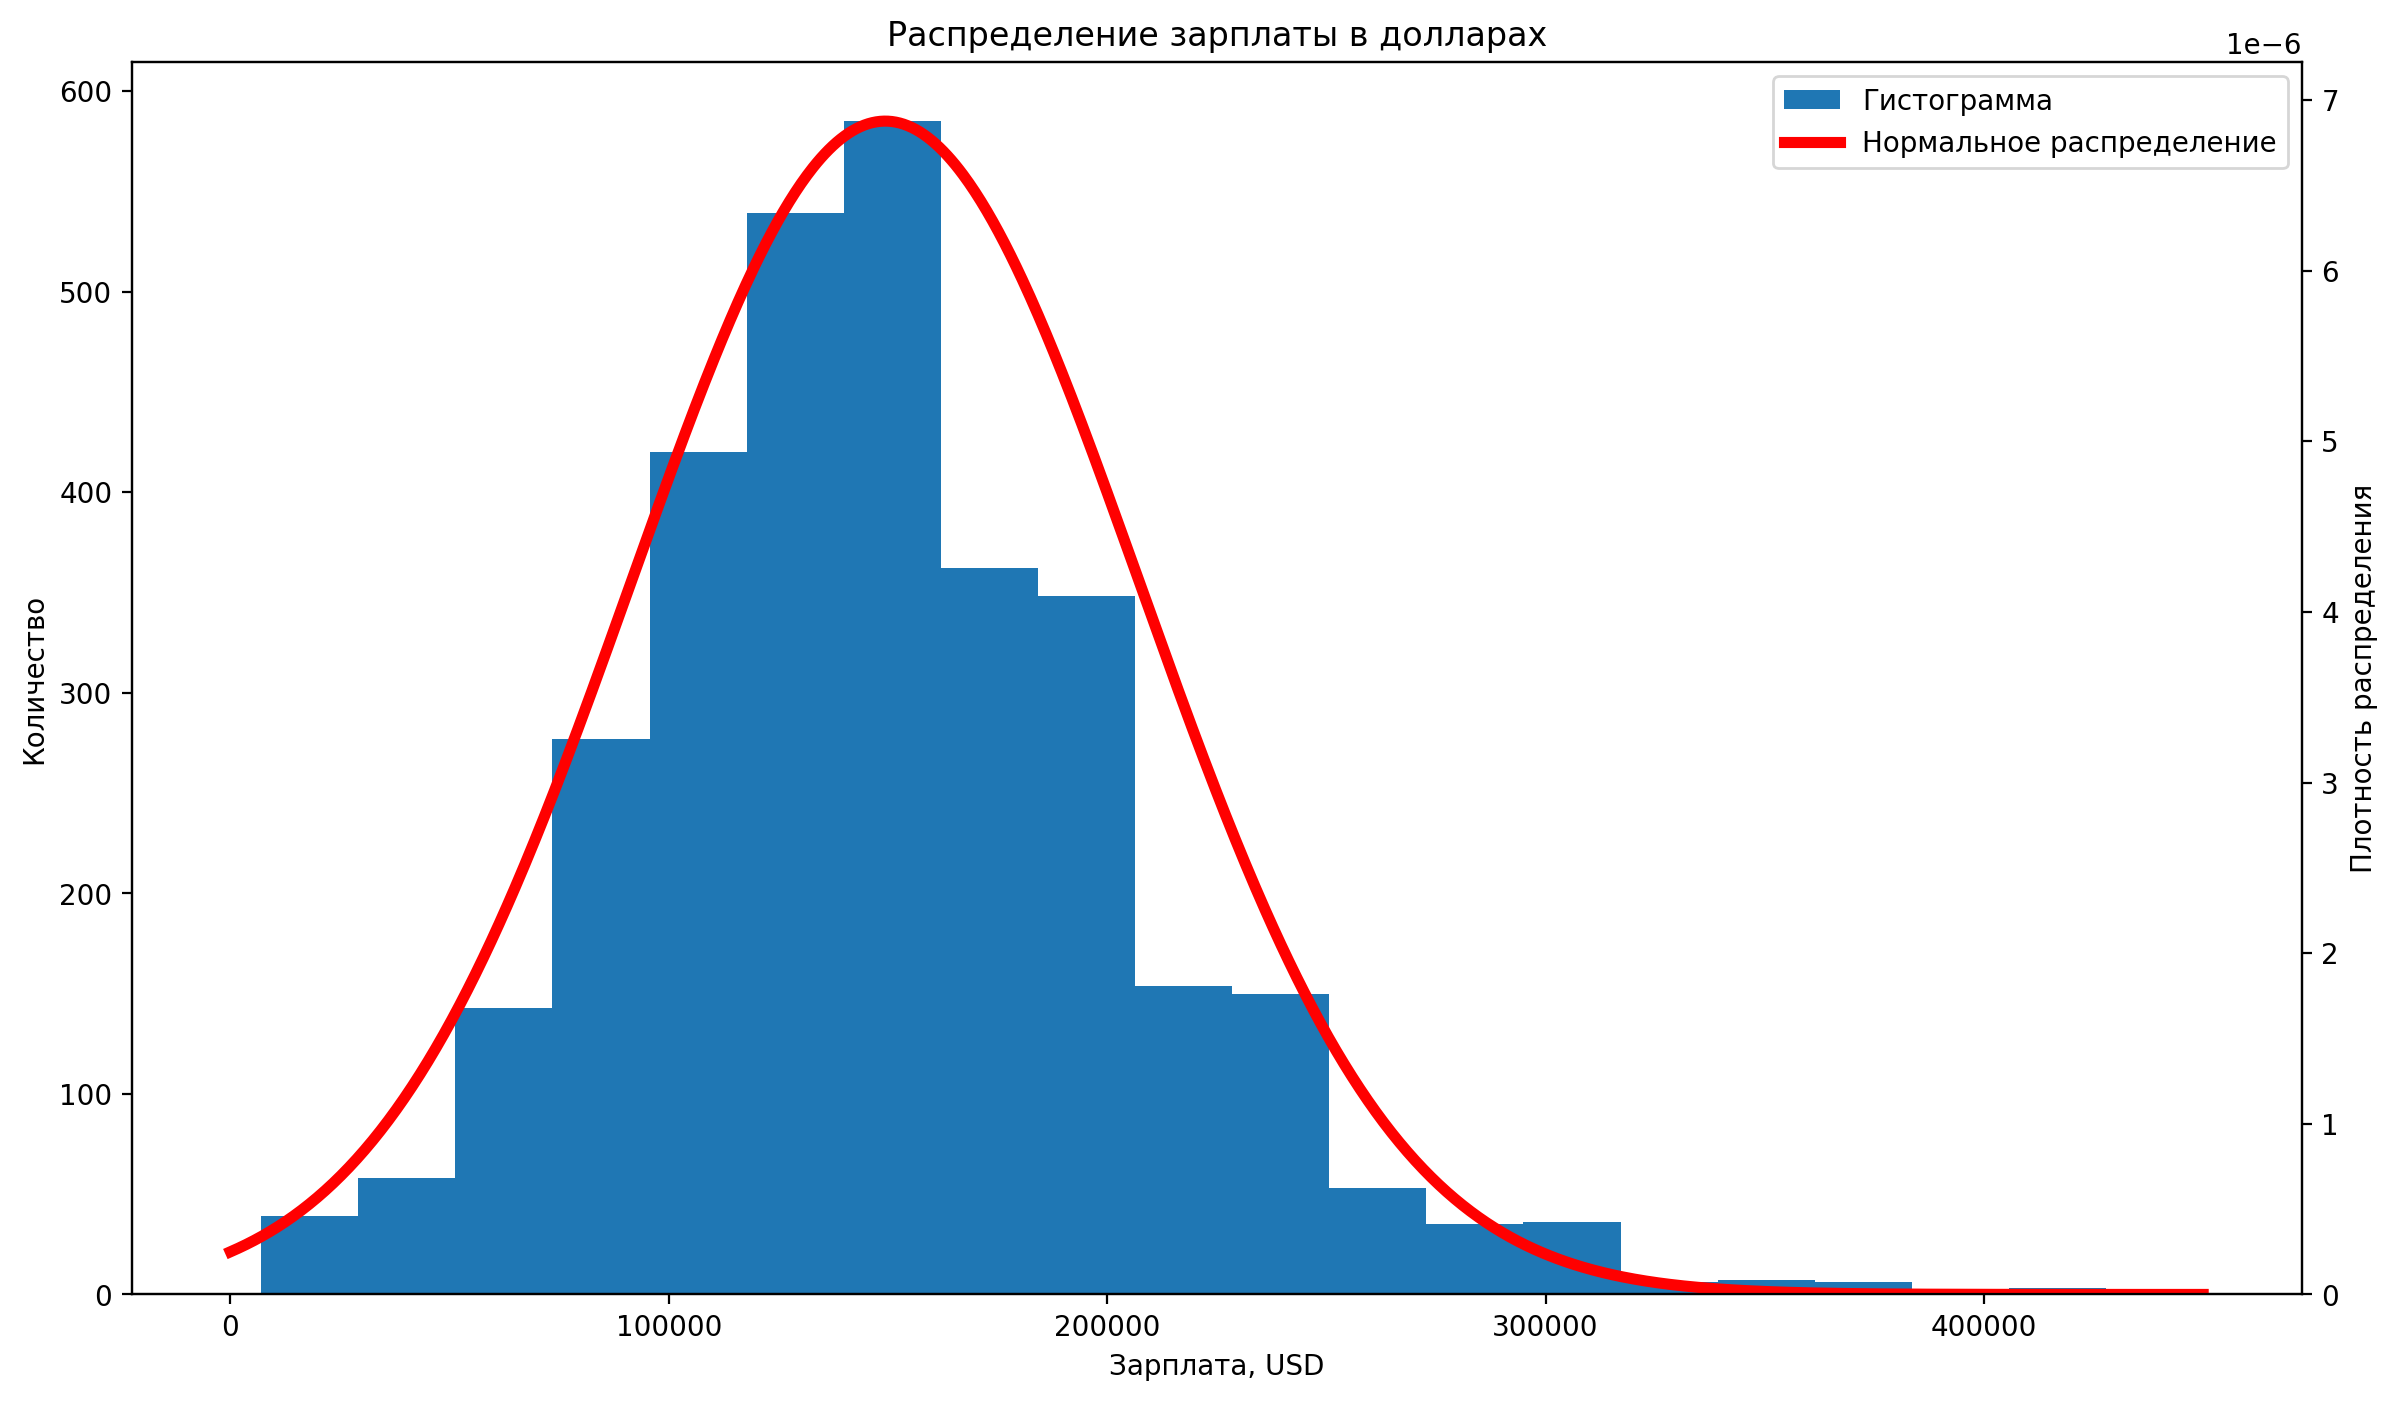

In [64]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=200)
ax1 = ax.twinx()

ax.set_title('Распределение зарплаты в долларах')
ax.set_ylabel('Количество')
ax1.set_ylabel('Плотность распределения')
ax.set_xlabel('Зарплата, USD')

line1 = ax.hist(df_salaries['salary'], bins=20, label='Гистограмма')

mean, std = df_salaries['salary'].mean(), df_salaries['salary'].std()
x_min, x_max = 0, df_salaries['salary'].max()
x = np.linspace(x_min, x_max, 1000)
p = scipy.stats.norm.pdf(x, mean, std)
line2 = ax1.plot(x, p, linewidth=4, color='red', label='Нормальное распределение')

handles, labels = np.hstack(
    [
        axis.get_legend_handles_labels()
        for axis in ax.figure.axes
        if axis.bbox.bounds == ax.bbox.bounds
    ]
).tolist()
ax1.legend(handles=handles, labels=labels, loc='upper right')

plt.ylim(bottom=0)


### Статистики для этого датасета

In [65]:
def print_stats(df: pd.DataFrame, x: str, meter : str):
    mean_value = df[x].mean()
    variance = df[x].var()
    skewness = df[x].skew()
    kurtosis = df[x].kurtosis()
    quantile_05 = df[x].quantile(0.05)
    quantile_95 = df[x].quantile(0.95)
    quantile_025 = df[x].quantile(0.025)

    print(
    f"""
    Математическое ожидание: {mean_value:.2f} {meter}
    Дисперсия: {variance:.2f} {meter}²
    Асимметрия: {skewness:.2f}
    Эксцесс: {kurtosis:.2f}
    Квантиль 0,05: {quantile_05:.2f} {meter}
    Квантиль 0,95: {quantile_95:.2f} {meter}
    2,5%-ная точка: {quantile_025:.2f} {meter}
    """)


In [66]:
print_stats(df_salaries, 'salary', 'USD')



    Математическое ожидание: 149366.91 USD
    Дисперсия: 3366139410.34 USD²
    Асимметрия: 0.62
    Эксцесс: 1.17
    Квантиль 0,05: 63000.00 USD
    Квантиль 0,95: 250000.00 USD
    2,5%-ная точка: 50000.00 USD
    


### Датасет из первой лабораторной работы

In [67]:
df_iris = pd.read_csv('data/Iris.csv')


(0.0, 0.965713159868697)

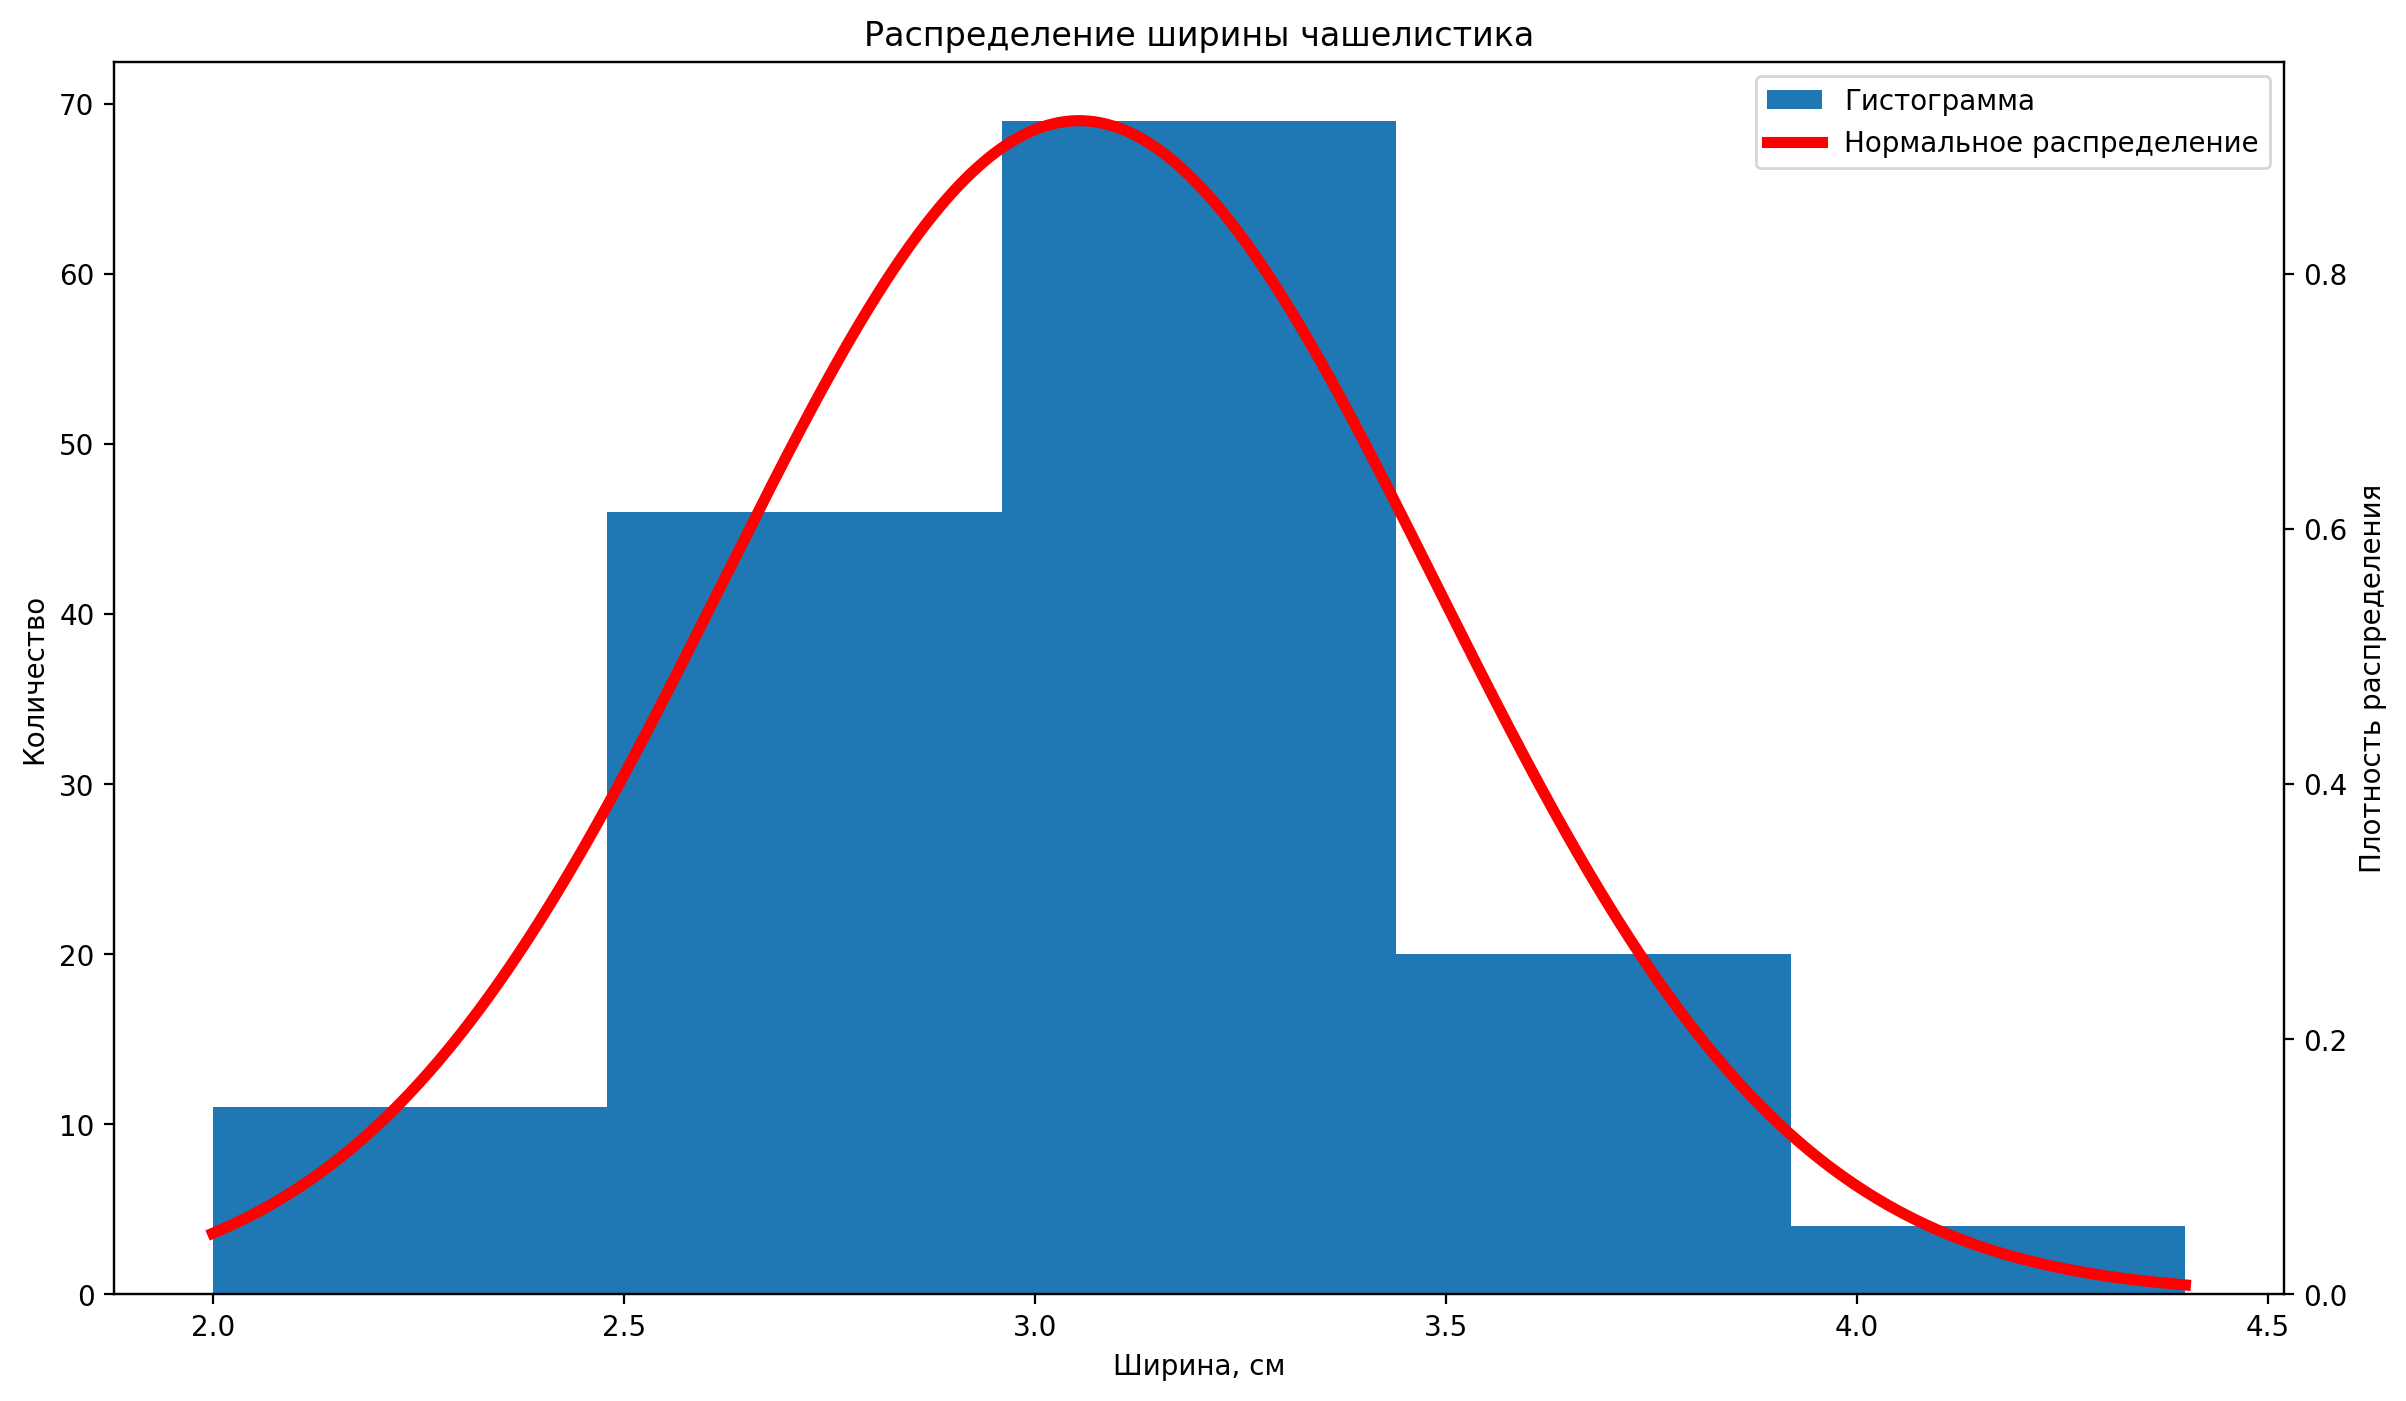

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=200)
ax1 = ax.twinx()

ax.set_title('Распределение ширины чашелистика')
ax.set_ylabel('Количество')
ax1.set_ylabel('Плотность распределения')
ax.set_xlabel('Ширина, см')

line1 = ax.hist(df_iris['SepalWidthCm'], bins=5, label='Гистограмма')

mean, std = df_iris['SepalWidthCm'].mean(), df_iris['SepalWidthCm'].std()
x_min, x_max = 2, df_iris['SepalWidthCm'].max()
x = np.linspace(x_min, x_max, 1000)
p = scipy.stats.norm.pdf(x, mean, std)
line2 = ax1.plot(x, p, linewidth=4, color='red', label='Нормальное распределение')

handles, labels = np.hstack(
    [
        axis.get_legend_handles_labels()
        for axis in ax.figure.axes
        if axis.bbox.bounds == ax.bbox.bounds
    ]
).tolist()
ax1.legend(handles=handles, labels=labels, loc='upper right')

plt.ylim(bottom=0)


In [ ]:
print_stats(df_iris, 'SepalWidthCm', 'см')



    Математическое ожидание: 3.05 см
    Дисперсия: 0.19 см²
    Асимметрия: 0.33
    Эксцесс: 0.29
    Квантиль 0,05: 2.34 см
    Квантиль 0,95: 3.80 см
    2,5%-ная точка: 2.27 см
    
